#**Logistic Regression: Water Quality**

####The objective of the analysis is to predict whether the water is safe for consumption or not, using a logistic regression model. Additionally, the analysis aims to identify which factors have a significant impact on water quality and thus influence the drinkability of water. By identifying these factors, the logistic regression model can provide insights into which variables are most important to consider when assessing water quality and making decisions about whether it is safe to drink.

####For this analysis we will be using the following libraries: *Pandas, Scikit-Learn, Numpy and Matplotlib*

In [250]:
#Importing libraries for logical regression model 
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#**Data Set**:
####This is a set of data created from imaginary data of water quality in an urban environment. For educational purposes only. 

####**Variables**: *aluminium,ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, uranium, is_safe (class attribute {0 - not safe, 1 - safe})*



#**Exploratory Analysis:**

In [251]:
#Load the data from a CSV file

wq_df = pd.read_csv("waterQuality1.csv")
wq_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [252]:
# Row and columns

wq_df.shape

(7996, 21)

In [253]:
# Getting basic stats on the dataset

wq_df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [254]:
# Number of instances for is_safe (0 or 1)
# 0=FALSE safe 1=TRUE

wq_df.groupby("is_safe").size()

is_safe
0    7084
1     912
dtype: int64

In [255]:
# Checking  if there are missing values 

wq_df.isnull().any().any()

False

#**Pre-processing:**

In [256]:
# Selecting the features or independent variables and the dependent variable or target vector
# No need to change is_safe to integer

wq_df = wq_df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium','is_safe' ]]
wq_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Defining X (independent/features) and Y (dependent/target vector) varibles:

In [257]:
X = np.asarray(wq_df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])
X[0:5]

array([[1.65e+00, 9.08e+00, 4.00e-02, 2.85e+00, 7.00e-03, 3.50e-01,
        8.30e-01, 1.70e-01, 5.00e-02, 2.00e-01, 0.00e+00, 5.40e-02,
        1.61e+01, 1.13e+00, 7.00e-03, 3.78e+01, 6.78e+00, 8.00e-02,
        3.40e-01, 2.00e-02],
       [2.32e+00, 2.12e+01, 1.00e-02, 3.31e+00, 2.00e-03, 5.28e+00,
        6.80e-01, 6.60e-01, 9.00e-01, 6.50e-01, 6.50e-01, 1.00e-01,
        2.01e+00, 1.93e+00, 3.00e-03, 3.23e+01, 3.21e+00, 8.00e-02,
        2.70e-01, 5.00e-02],
       [1.01e+00, 1.40e+01, 4.00e-02, 5.80e-01, 8.00e-03, 4.24e+00,
        5.30e-01, 2.00e-02, 9.90e-01, 5.00e-02, 3.00e-03, 7.80e-02,
        1.42e+01, 1.11e+00, 6.00e-03, 5.03e+01, 7.07e+00, 7.00e-02,
        4.40e-01, 1.00e-02],
       [1.36e+00, 1.13e+01, 4.00e-02, 2.96e+00, 1.00e-03, 7.23e+00,
        3.00e-02, 1.66e+00, 1.08e+00, 7.10e-01, 7.10e-01, 1.60e-02,
        1.41e+00, 1.29e+00, 4.00e-03, 9.12e+00, 1.72e+00, 2.00e-02,
        4.50e-01, 5.00e-02],
       [9.20e-01, 2.43e+01, 3.00e-02, 2.00e-01, 6.00e-03, 2.67e+00,


In [258]:
y = np.asarray(wq_df['is_safe'])
y [0:5]

array([1, 1, 0, 1, 1])

##Normalizing the dataset:

In [259]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.78, -0.59, -0.48,  1.05, -0.99, -0.71,  2.15, -0.97, -1.66,
        -0.36, -0.87, -0.78,  1.13, -0.35,  0.61,  1.2 ,  1.66,  1.05,
         1.34, -0.92],
       [ 1.31,  0.78, -0.6 ,  1.43, -1.13,  1.21,  1.6 , -0.22,  0.29,
         1.  ,  0.85,  0.01, -1.41,  1.05, -0.74,  0.89,  0.12,  1.05,
         0.85,  0.2 ],
       [ 0.27, -0.03, -0.48, -0.81, -0.97,  0.8 ,  1.04, -1.2 ,  0.5 ,
        -0.82, -0.86, -0.37,  0.78, -0.38,  0.27,  1.91,  1.79,  0.71,
         2.04, -1.29],
       [ 0.55, -0.33, -0.48,  1.14, -1.16,  1.97, -0.8 ,  1.31,  0.71,
         1.18,  1.01, -1.43, -1.52, -0.07, -0.4 , -0.42, -0.52, -1.03,
         2.1 ,  0.2 ],
       [ 0.2 ,  1.13, -0.52, -1.12, -1.02,  0.19,  1.64, -0.36, -0.37,
        -0.58, -0.87,  0.3 , -0.56, -0.38, -0.74,  0.02, -0.22, -1.03,
        -0.61, -0.92]])

##Splitting dataset into Test/Train sets:

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6396, 20) (6396,)
Test set: (1600, 20) (1600,)


In [261]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [262]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

# Evaluating the ML model: 

## jaccard index
#### The Jaccard index is a value between 0 and 1, with 1 indicating perfect overlap between the predicted positive instances and the true positive instances. A Jaccard index of 0 indicates no overlap between the predicted positive instances and the true positive instances.

####The Jaccard index can be used as an evaluation metric for logistic regression models, particularly in cases where the positive class is rare or imbalanced. A higher Jaccard index indicates better performance of the model in correctly identifying positive instances.

In [263]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8972559029993619

##Log loss:
### In logistic regression, the model predicts the probability of an instance belonging to the positive class (usually labeled as 1) using a sigmoid function. The predicted probability is compared with the true binary label (1 or 0), and the log loss is calculated as the negative log-likelihood of the true label given the predicted probability.

In [264]:
from sklearn.metrics import log_loss
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.26038673012569985

##The intercept and coefficients are the parameters of the logistic regression equation, which can be used to calculate the predicted log odds of the target variable. The predicted probabilities are calculated by applying the logistic function to the predicted log odds.

In [265]:
# intercept and coefficients
print("Intercept:", LR.intercept_)
print("Coefficients:", LR.coef_)

# predicted probabilities for the test set
yhat_prob = LR.predict_proba(X_test)
print("Predicted Probabilities:", yhat_prob)

Intercept: [-2.1]
Coefficients: [[ 0.61 -0.13 -0.43  0.06 -0.43  0.3   0.22 -0.12  0.03  0.09 -0.24 -0.06
  -0.14 -0.07 -0.05 -0.23 -0.06 -0.05 -0.12 -0.23]]
Predicted Probabilities: [[0.75 0.25]
 [0.89 0.11]
 [0.96 0.04]
 ...
 [0.82 0.18]
 [0.9  0.1 ]
 [0.87 0.13]]


##The ROC curve plots the true positive rate (TPR) on the y-axis against the false positive rate (FPR) on the x-axis for different threshold values. The AUC score is a measure of the area under the ROC curve, with a perfect classifier having an AUC score of 1.

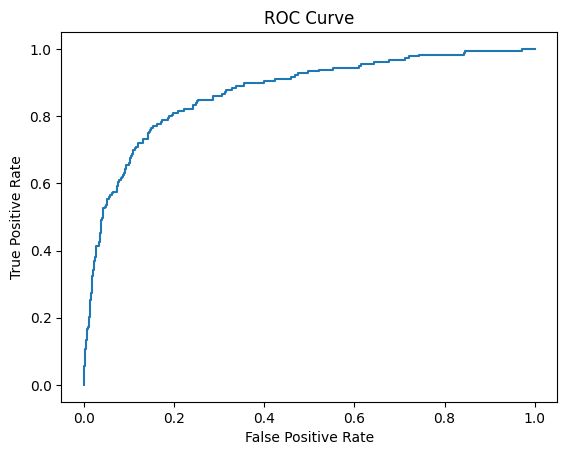

AUC Score: 0.8719722911318255


In [266]:
from sklearn.metrics import roc_curve, roc_auc_score

# compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, yhat_prob[:, 1], pos_label=1)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# compute the area under the ROC curve
auc_score = roc_auc_score(y_test, yhat_prob[:, 1])
print("AUC Score:", auc_score)


#Confusion Matrix:


In [267]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  33  146]
 [  15 1406]]


Confusion matrix, without normalization
[[  33  146]
 [  15 1406]]


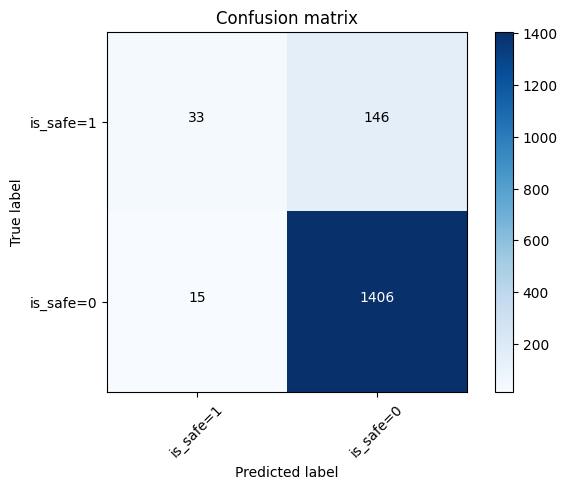

In [268]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_safe=1','is_safe=0'],normalize= False,  title='Confusion matrix')

##Calculating precision & recall:

In [269]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1421
           1       0.69      0.18      0.29       179

    accuracy                           0.90      1600
   macro avg       0.80      0.59      0.62      1600
weighted avg       0.88      0.90      0.87      1600



#Feature Importance Plot:


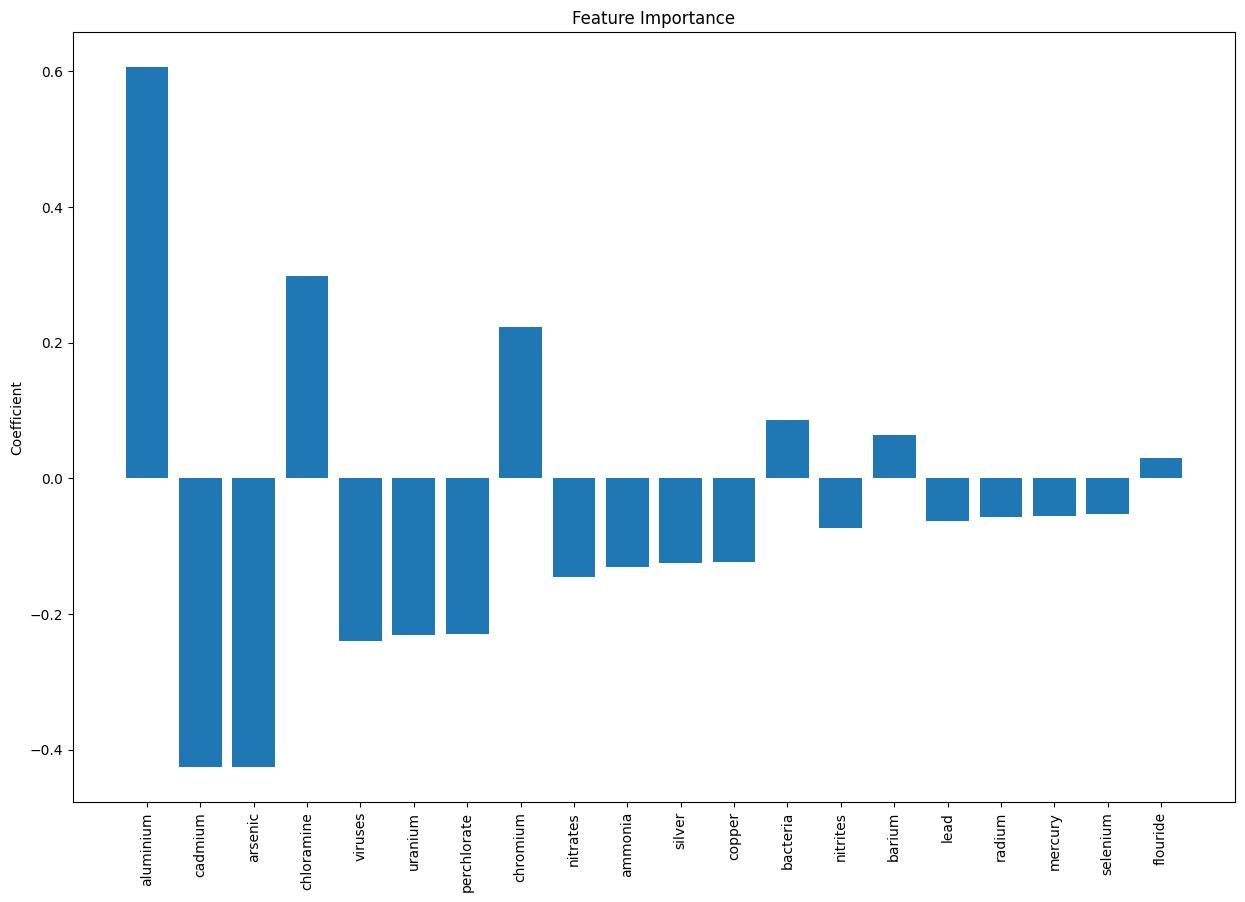

In [270]:
# Get the coefficients from the logistic regression model
coef = LR.coef_.ravel()

# Create a list of feature names
features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']

# Create a dictionary of coefficients and feature names
coef_dict = dict(zip(features, coef))

# Sort the dictionary by coefficient value
sorted_coef_dict = dict(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Plot the coefficients
plt.figure(figsize=(15, 10))
plt.bar(range(len(sorted_coef_dict)), list(sorted_coef_dict.values()))
plt.xticks(range(len(sorted_coef_dict)), list(sorted_coef_dict.keys()), rotation='vertical')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.show()



